In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import *

# Data load
data = pd.read_csv('logistic_regression_training_data.csv') 
test_data = pd.read_csv('logistic_regression_testing_data.csv')

data_np = data.values  # Change dataframe object to numpy array
test_data_np = test_data.values

y = data_np[:,0] # Data preprocessing
X = data_np[:,1:]
y_t = test_data_np[:,0]
X_t = test_data_np[:,1:]
N = len(data['label'].values)
N_t = len(test_data['label'].values)
X2 = np.c_[np.ones(N), X] # Consider Intercept term 
X2_t = np.c_[np.ones(N_t), X_t]

w_init = np.zeros(len(X2[0,:]))
w_init1 = np.zeros(len(X[0,:]))

def indic(y,p_y):
    if y == p_y:
        return 1
    else :
        return 0 

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sign(x):
    if x>=0:
        return 1
    else:
        return 0

In [8]:
len(w_init1)

8

In [19]:
def logis_sgd(X, y, w, etha, iterations,a):
    error_history = []
    whist = []
    p = np.zeros(len(w))
    y_p = np.zeros(X.shape[0])
    sum_error = 0
    for k in range(iterations):
        
        i = randint(0,X.shape[0]-1)
            
        for j in range(len(w)): 
            
            p[j] = (X[i,j])*(y[i]-sigmoid(np.dot(X[i,:],w)))
            w[j] = w[j] + (etha*p[j])
        
            
        y_p[i] = sign(np.dot(X[i,:],w))
        error = y_p[i] - y[i]
        sum_error += error**2
        
        whist.append(w.copy())
        print(w)
        
        if k!=0 and k%100==0:
            error_history.append(sum_error/k)
        
    
    return  whist.copy(), error_history

In [30]:
a = 5
b=a
b=3



In [31]:
print(a,b)

5 3


In [26]:
a = int(5)
b=a
a = int(3)

In [21]:
w_hist, errhist = logis_sgd(X,y,w_init1,0.8,100,a)

[ 2.48478321  4.18190905 -3.86617254 -0.40093615 -1.25694489 -4.26231884
  1.6506612  -1.59249608]
[ 2.46759268  4.13472249 -3.9160757  -0.42269981 -1.28760055 -4.29750717
  1.64634013 -1.59470029]
[ 2.45530721  4.07340312 -3.99063466 -0.451746   -1.29890984 -4.33335759
  1.63687463 -1.59470029]
[ 2.45234808  4.05925167 -4.00822296 -0.46818125 -1.30541448 -4.34729344
  1.63514127 -1.59751907]
[ 2.40551397  4.02998112 -4.05990606 -0.46818125 -1.30541448 -4.38427262
  1.6293525  -1.61827389]
[ 2.39598922  4.00722126 -4.09681757 -0.50337997 -1.31127107 -4.41242428
  1.62096415 -1.6195619 ]
[ 2.34407112  3.93885179 -4.16401844 -0.50337997 -1.31127107 -4.49643689
  1.58117943 -1.6302622 ]
[ 2.44689583  4.44580319 -3.92506867 -0.33537553 -1.15937285 -4.27078235
  1.67759122 -1.52170357]
[ 2.52278336  4.84704319 -3.58500443 -0.07701146 -0.96714915 -4.0003762
  1.85735318 -1.44413086]
[ 2.50969678  4.73531041 -3.71447237 -0.11537042 -0.98250437 -4.05853003
  1.85136325 -1.46717913]
[ 2.4962168

In [22]:
a

[array([ 2.48478321,  4.18190905, -3.86617254, -0.40093615, -1.25694489,
        -4.26231884,  1.6506612 , -1.59249608]),
 array([ 2.46759268,  4.13472249, -3.9160757 , -0.42269981, -1.28760055,
        -4.29750717,  1.64634013, -1.59470029]),
 array([ 2.45530721,  4.07340312, -3.99063466, -0.451746  , -1.29890984,
        -4.33335759,  1.63687463, -1.59470029]),
 array([ 2.45234808,  4.05925167, -4.00822296, -0.46818125, -1.30541448,
        -4.34729344,  1.63514127, -1.59751907]),
 array([ 2.40551397,  4.02998112, -4.05990606, -0.46818125, -1.30541448,
        -4.38427262,  1.6293525 , -1.61827389]),
 array([ 2.39598922,  4.00722126, -4.09681757, -0.50337997, -1.31127107,
        -4.41242428,  1.62096415, -1.6195619 ]),
 array([ 2.34407112,  3.93885179, -4.16401844, -0.50337997, -1.31127107,
        -4.49643689,  1.58117943, -1.6302622 ]),
 array([ 2.44689583,  4.44580319, -3.92506867, -0.33537553, -1.15937285,
        -4.27078235,  1.67759122, -1.52170357]),
 array([ 2.52278336,  4.

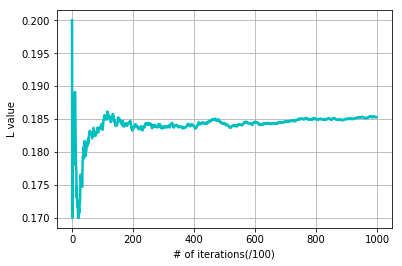

In [6]:
x1 = range(0,999)
y1 = [errhist[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('# of iterations(/100)')
plt.ylabel('L value')
plt.grid(True)
plt.show()

In [66]:
def error_calculate(X, y, w): # Implementing error calculation function
    y_p = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        y_p[i] = np.sign(np.dot(X[i,:],w))
    error = np.sum((y- y_p) ** 2) # Saving error (RSS) 
    
    return error 


In [67]:
rss=[]
for i in range(1000):
    rss.append(error_calculate(X2_t,y_t,whist[i*100]))

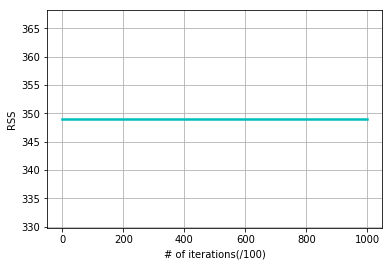

In [68]:
x2 = range(0,999)
y2 = [rss[v] for v in x2]

# Plot the graph
plt.plot(x2,y2,'c-',lw=2.5)
plt.xlabel('# of iterations(/100)')
plt.ylabel('RSS')
plt.grid(True)
plt.show()

In [87]:
def cal_accuracy(X,y,w):
    cnt = 0
    y_p = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        y_p[i] = np.sign(np.dot(X[i,:],w))
        if y[i] == y_p[i]:
            cnt += 1
    
    return cnt/X.shape[0]

In [ ]:
def avg_w(w_hist):
    sum_w = np.zeros(9)
    for i in range(99000,100000):
        sum_w += w_hist[i]
    return sum_w/1000

In [ ]:
a = np.zeros(5)

In [ ]:
def logis_sgd(X, y, w, etha, iterations):
    error_history = []
    
    p = np.zeros(len(w))
    y_p = np.zeros(X.shape[0])
    sum_error = 0
    t=0
    while(t < iterations):
        
        for i in range(X.shape[0]):
            
            for j in range(len(w)): # Updating w
            
            
                p[j] = (X[i,j])*(y[i]-sigmoid(np.dot(X[i,:],w)))
                w[j] = w[j] + (etha*p[j])
           
            
            y_p[i] = sign(sigmoid(np.dot(X[i,:],w)))
            error = y_p[i] -  y[i]
            sum_error += error**2
        
            if t!=0 and t%100==0:
                error_history.append(sum_error/t)
                
            t = t+1
            #print(t)
            

    return  error_history